In [18]:
import scipy.stats as stats
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [19]:
def prepare_data(df, train_year, test_year):
    # Ensure datetime is in datetime format
    df['UTC time'] = pd.to_datetime(df['UTC time'])
    
    # Filter for training year (e.g., 2020) and exclude the last 24 hours
    train_data = df[(df['UTC time'].dt.year == train_year)]
    X_train = train_data['carbon_intensity'].values[:-24].reshape(-1, 1)  # All except last day
    y_train = train_data['carbon_intensity'].values[24:].reshape(-1, 1)   # Start from second day till end
    
    print(X_train.shape, y_train.shape)
    #print last value of X_train and y_train
    print(X_train[-1], y_train[-1])
    
    # Filter for testing year (e.g., 2021)
    test_data = df[(df['UTC time'].dt.year == test_year)]
    y_test = test_data['carbon_intensity'].values.reshape(-1, 1)  # All values for the test year
    print(y_test.shape)
    
    return X_train, y_train, y_test

# Load your dataset
df = pd.read_csv('./data/BPAT/BPAT_direct_emissions.csv')

# Specify the training and testing years
train_year = 2020
test_year = 2021

# Prepare the data
X_train, y_train, y_test = prepare_data(df, train_year, test_year)

# 3. Train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict the values for the test set
y_pred = model.predict(y_test[:-24])
#print(y_pred.head())

# 5. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[24:], y_pred))
mape = mean_absolute_percentage_error(y_test[24:], y_pred)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

(8760, 1) (8760, 1)
[38.17] [35.02]
(8760, 1)
RMSE: 6.621993562793514
MAPE: 0.12932032675796298


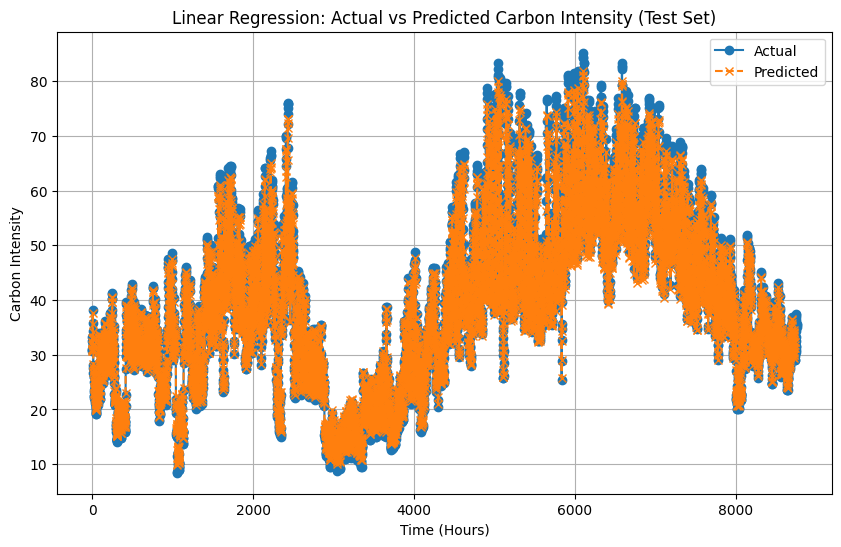

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o')
plt.plot(range(len(y_pred)), y_pred, label="Predicted", linestyle='--', marker='x')
plt.xlabel('Time (Hours)')
plt.ylabel('Carbon Intensity')
plt.title('Linear Regression: Actual vs Predicted Carbon Intensity (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
def prepare_data(df, train_year, test_year):
    # Ensure datetime is in datetime format
    df['UTC time'] = pd.to_datetime(df['UTC time'])
    
    # Filter for training year (e.g., 2020) and exclude the last 24 hours
    train_data = df[(df['UTC time'].dt.year == train_year)]
    X_train = train_data['carbon_intensity'].values[:-24].reshape(-1, 1)  # All except last day
    y_train = train_data['carbon_intensity'].values[24:].reshape(-1, 1)   # Start from second day till end
    
    print(X_train.shape, y_train.shape)
    #print last value of X_train and y_train
    print(X_train[-1], y_train[-1])
    
    # Filter for testing year (e.g., 2021)
    test_data = df[(df['UTC time'].dt.year == test_year)]
    y_test = test_data['carbon_intensity'].values.reshape(-1, 1)  # All values for the test year
    print(y_test.shape)
    
    return X_train, y_train, y_test

# Load your dataset
df1 = pd.read_csv('./data/FPL/FPL_direct_emissions.csv')

# Specify the training and testing years
train_year = 2020
test_year = 2021

# Prepare the data
X_train, y_train, y_test = prepare_data(df1, train_year, test_year)

# 3. Train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict the values for the test set
y_pred = model.predict(y_test)

# 5. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

(8760, 1) (8760, 1)
[310.69] [312.92]
(8760, 1)
RMSE: 2.837195816835665
MAPE: 0.008213525713990418


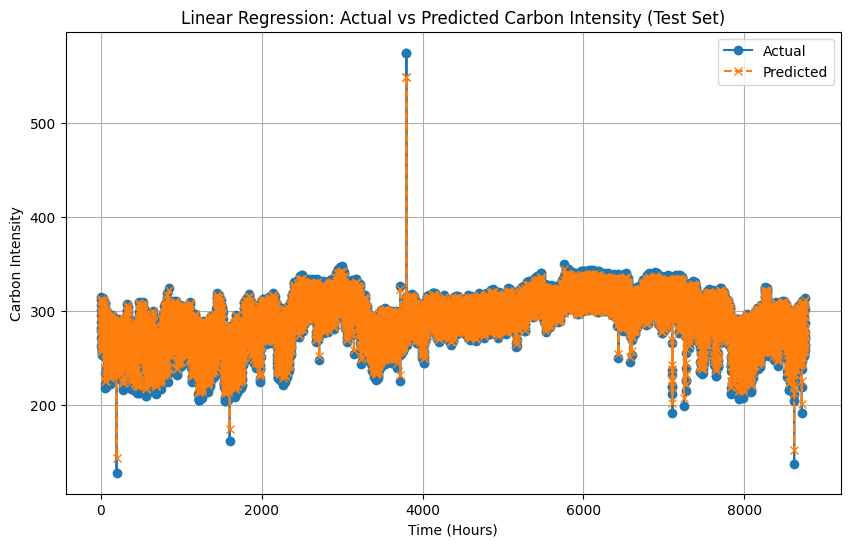

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o')
plt.plot(range(len(y_pred)), y_pred, label="Predicted", linestyle='--', marker='x')
plt.xlabel('Time (Hours)')
plt.ylabel('Carbon Intensity')
plt.title('Linear Regression: Actual vs Predicted Carbon Intensity (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
def prepare_data(df, train_year, test_year):
    # Ensure datetime is in datetime format
    df['UTC time'] = pd.to_datetime(df['UTC time'])
    
    # Filter for training year (e.g., 2020) and exclude the last 24 hours
    train_data = df[(df['UTC time'].dt.year == train_year)]
    X_train = train_data['carbon_intensity'].values[:-24].reshape(-1, 1)  # All except last day
    y_train = train_data['carbon_intensity'].values[24:].reshape(-1, 1)   # Start from second day till end
    
    print(X_train.shape, y_train.shape)
    #print last value of X_train and y_train
    print(X_train[-1], y_train[-1])
    
    # Filter for testing year (e.g., 2021)
    test_data = df[(df['UTC time'].dt.year == test_year)]
    y_test = test_data['carbon_intensity'].values.reshape(-1, 1)  # All values for the test year
    print(y_test.shape)
    
    return X_train, y_train, y_test

# Load your dataset
df1 = pd.read_csv('./data/ISNE/ISNE_direct_emissions.csv')

# Specify the training and testing years
train_year = 2020
test_year = 2021

# Prepare the data
X_train, y_train, y_test = prepare_data(df1, train_year, test_year)

# 3. Train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict the values for the test set
y_pred = model.predict(y_test)

# 5. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

(8760, 1) (8760, 1)
[255.17] [236.94]
(8760, 1)
RMSE: 7.354626323869439
MAPE: 0.026389552295106262


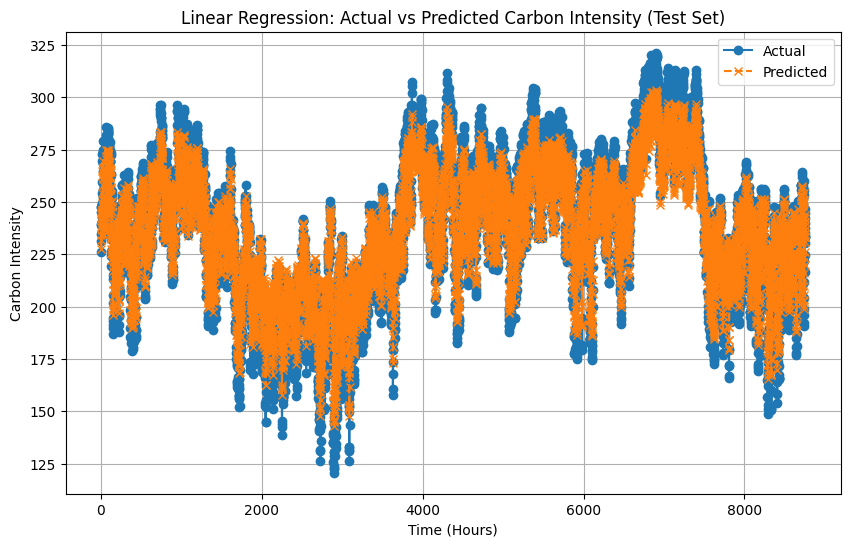

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o')
plt.plot(range(len(y_pred)), y_pred, label="Predicted", linestyle='--', marker='x')
plt.xlabel('Time (Hours)')
plt.ylabel('Carbon Intensity')
plt.title('Linear Regression: Actual vs Predicted Carbon Intensity (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
def prepare_data(df, train_year, test_year):
    # Ensure datetime is in datetime format
    df['UTC time'] = pd.to_datetime(df['UTC time'])
    
    # Filter for training year (e.g., 2020) and exclude the last 24 hours
    train_data = df[(df['UTC time'].dt.year == train_year)]
    X_train = train_data['carbon_intensity'].values[:-24].reshape(-1, 1)  # All except last day
    y_train = train_data['carbon_intensity'].values[24:].reshape(-1, 1)   # Start from second day till end
    
    print(X_train.shape, y_train.shape)
    #print last value of X_train and y_train
    print(X_train[-1], y_train[-1])
    
    # Filter for testing year (e.g., 2021)
    test_data = df[(df['UTC time'].dt.year == test_year)]
    y_test = test_data['carbon_intensity'].values.reshape(-1, 1)  # All values for the test year
    print(y_test.shape)
    
    return X_train, y_train, y_test

# Load your dataset
df1 = pd.read_csv('./data/PJM/PJM_direct_emissions.csv')

# Specify the training and testing years
train_year = 2020
test_year = 2021

# Prepare the data
X_train, y_train, y_test = prepare_data(df1, train_year, test_year)

# 3. Train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict the values for the test set
y_pred = model.predict(y_test)

# 5. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

(8760, 1) (8760, 1)
[291.33] [307.59]
(8760, 1)
RMSE: 5.538971301440903
MAPE: 0.013850039521086564


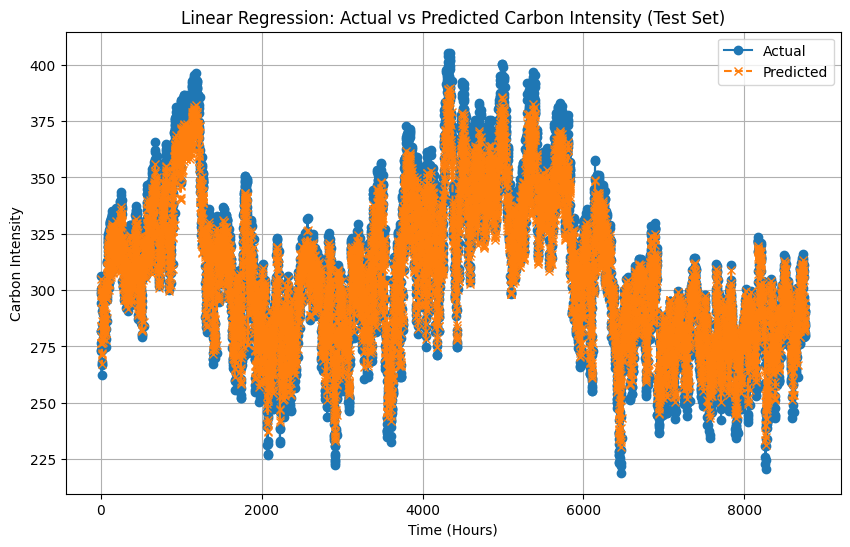

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o')
plt.plot(range(len(y_pred)), y_pred, label="Predicted", linestyle='--', marker='x')
plt.xlabel('Time (Hours)')
plt.ylabel('Carbon Intensity')
plt.title('Linear Regression: Actual vs Predicted Carbon Intensity (Test Set)')
plt.legend()
plt.grid(True)
plt.show()